# Market Microstruture project

## Javier Alejandro Fajardo López

### Paqueterías

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Distribución Erlang

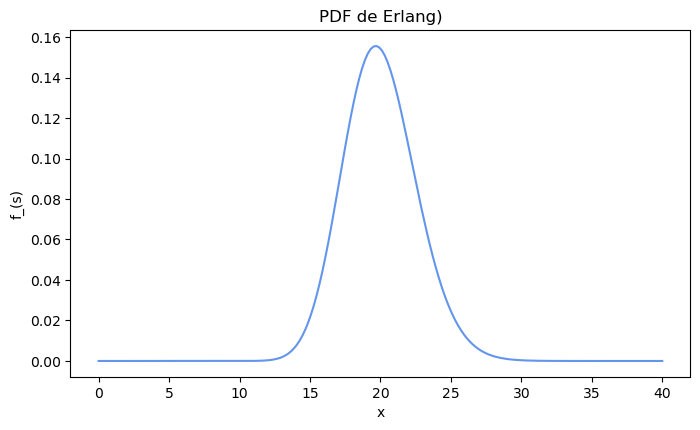

In [17]:
k = 60
lam = 3
x = np.linspace(0, 40, 200)

pdf = (lam**k) * (x**(k-1)) * np.exp(-lam*x) / math.factorial(k-1)

plt.figure(figsize=(8,4.5))
plt.plot(x, pdf, color='cornflowerblue')
plt.title(f'PDF de Erlang)')
plt.xlabel('x')
plt.ylabel('f_(s)')
plt.show()